<a href="https://colab.research.google.com/github/ankit-rathi/Quantvesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxirr
!pip install yfinance==0.2.59
!pip install ta

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/quantvesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2025-07-11 21:46:02
-------------------
qualified stocks: 96
with latest results: 31
still star stocks: 20
-------------------
Initial Investment:  1.17 C
CY Investment:  1.44 C
Reserve:  9.00 K
Current:  1.36 C
-------------------
Today PnL: -1.09 L (-0.8%)
Current PnL: -14.40 L (-10.03%)
CY Booked + Current PnL: -7.03 L (-4.9%)
-------------------
Total profit:  4.31 L
Total loss:  -18.71 L
-------------------
Total Booked + Current PnL: 19.95 L (17.12%)
Total Booked PnL: 34.35 L (29.47%)
Curr Year Booked PnL: 7.37 L (5.41%)
Prev Year Booked PnL: 26.98 L (23.15%)
Est FTT:  2.09 C
Est FTT PnL: 72.73 L (53.43%)
Deployed:  1.17 C
Current:  1.36 C
CAGR/XIRR %: 10.4%


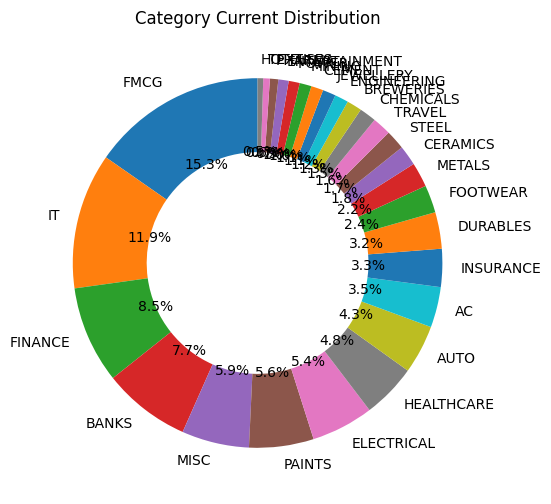

In [3]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

eod = 0

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2(eod)
cols = ['Symbol', 'AvgCost', 'FTT', 'Dev%_PE', 'Spread%', 'Conviction', 'RSI_14', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'CumlRnk', 'RRR Ind', 'CurrAlloc%', 'Gained%',  'Criteria', 'Category','Strategy']

tmp_df = df_portfolio_features
list_x40 = list(tmp_df[tmp_df['MBQ'].str.contains('X40', na=False)]['Symbol'].values)
list_x5k = list(tmp_df[tmp_df['MBQ'].str.contains('X5K', na=False)]['Symbol'].values)
list_x40n = list(tmp_df[tmp_df['MBQ'].str.contains('X40N', na=False)]['Symbol'].values)
list_hc = list(tmp_df[tmp_df['Conviction'].isin(['X-LC', 'H-LC', 'X-MC', 'X-SC'])]['Symbol'].values)
list_ox40 = list(tmp_df[tmp_df['MBQ'].str.contains('OX40', na=False)]['Symbol'].values)
list_ox40n = list(tmp_df[tmp_df['MBQ'].str.contains('OX40N', na=False)]['Symbol'].values)
#len(set(list_x40 + list_x5k) - set( list_x40n))
stock_list = list(set(list_x40 + list_x5k + list_hc)- set(list_ox40 + list_ox40n))

In [4]:
# all portfolio
tmp_df = df_portfolio_features[cols].sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
32,ENRIN,1377.95,3176.70,NaN,NaN,H-LC,81.0,79418.0,44969.0,0.0,...,130.54,0.00,130.54,25.0,inf,0.58,21.44,AR,ELECTRICAL,ATH
16,BLUSPRING,226.45,86.36,NaN,0.51,M-SC,55.0,18065.0,-31528.0,847.0,...,-63.57,4.69,-61.86,200.0,-37.22,0.13,21.15,XY24,MISC,ATH
28,DIGITIDE,188.38,237.72,NaN,0.45,M-SC,47.0,47628.0,6373.0,4434.0,...,15.45,9.31,26.19,195.0,1.44,0.35,12.13,XY24,IT,ATH
92,VIPIND,488.80,489.00,-223.38,9.62,H-SC,70.0,89027.0,-6289.0,6330.0,...,-6.60,7.11,0.04,161.0,-0.99,0.65,75.60,OX40N,MISC,NTT
70,SBIN,760.30,863.00,-11.51,3.38,M-LC,53.0,214292.0,12812.0,14400.0,...,6.36,6.72,13.51,77.0,0.89,1.58,19.76,XY25,BANKS,NTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,SAIL,130.64,228.00,92.75,10.59,M-MC,57.0,231316.0,6354.0,161297.0,...,2.82,69.73,74.53,193.0,0.04,1.70,34.30,XY24,STEEL,BTT
8,AWL,325.39,485.00,-67.95,9.02,H-MC,61.0,222667.0,-45780.0,177466.0,...,-17.05,79.70,49.05,98.0,-0.26,1.64,14.49,XY24,FMCG,NTT
65,REPCOHOME,515.07,880.00,-53.80,4.07,H-SC,54.0,170881.0,-34117.0,179357.0,...,-16.64,104.96,70.85,145.0,-0.19,1.26,37.94,XY24,FINANCE,NTT
11,BANDHANBNK,214.25,400.00,-31.70,9.65,H-SC,46.0,203684.0,-44846.0,260308.0,...,-18.04,127.80,86.70,136.0,-0.17,1.50,34.75,XY24,BANKS,NTT


In [5]:
# High quality (X40 + X40N + X5K + X-LC + H-LC + X-MC + X-SC) stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(stock_list))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5551.76,7934.00,-37.14,7.16,H-LC,38.0,224504.0,7985.0,84930.0,...,3.69,37.83,42.91,28.0,0.09,1.65,17.35,AR,ELECTRICAL,NTT
2,ACC,2579.05,3906.00,-32.87,7.02,M-MC,66.0,144722.0,-43549.0,140409.0,...,-23.13,97.02,51.45,173.0,-0.31,1.06,10.03,XY24,CEMENT,BTT
3,ALKYLAMINE,2347.98,4546.37,3.23,16.64,X-SC,55.0,96071.0,-4892.0,99424.0,...,-4.85,103.49,93.63,68.0,-0.05,0.71,43.10,SR,CHEMICALS,ATH
4,APOLLOHOSP,6904.43,8285.00,-20.84,5.00,H-LC,48.0,107842.0,4276.0,16435.0,...,4.13,15.24,20.00,33.0,0.26,0.79,18.78,X40N,HEALTHCARE,BTT
5,ASIANPAINT,2961.56,4250.00,-16.50,5.03,H-LC,64.0,165866.0,-35520.0,123139.0,...,-17.64,74.24,43.51,32.0,-0.29,1.22,15.46,X40,PAINTS,BTT
8,AWL,325.39,485.00,-67.95,9.02,H-MC,61.0,222667.0,-45780.0,177466.0,...,-17.05,79.70,49.05,98.0,-0.26,1.64,14.49,XY24,FMCG,NTT
9,BAJAJFINSV,1994.80,2758.00,-0.98,9.17,X-LC,51.0,98843.0,1098.0,36295.0,...,1.12,36.72,38.26,18.0,0.03,0.73,31.98,X40,FINANCE,BTT
10,BAJAJHFL,122.26,152.00,-4.46,3.99,H-LC,46.0,198096.0,-2410.0,51188.0,...,-1.20,25.84,24.33,41.0,-0.05,1.46,14.23,X40N,FINANCE,BTT
12,BANKINDIA,116.91,190.00,-32.52,10.83,H-MC,44.0,176193.0,-3615.0,116023.0,...,-2.01,65.85,62.52,108.0,-0.03,1.30,31.39,XR,BANKS,NTT
13,BATAINDIA,1550.24,2096.00,-31.15,6.02,M-SC,53.0,102845.0,-25825.0,71128.0,...,-20.07,69.16,35.20,211.0,-0.36,0.76,4.93,X40,FOOTWEAR,NTT


In [6]:
# OX40N stocks
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Symbol'].isin(list_ox40n))]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
0,5PAISA,564.75,565.0,145.19,6.76,H-SC,44.0,132152.0,-54780.0,54870.0,...,-29.30,41.52,0.04,156.0,-1.00,0.97,26.42,OX40N,FINANCE,NTT
21,CERA,8421.60,8422.0,-15.99,3.77,X-SC,50.0,86756.0,-22725.0,22730.0,...,-20.76,26.20,0.00,70.0,-1.00,0.64,32.56,OX40N,CERAMICS,NTT
46,INDIGOPNTS,1407.73,1408.0,127.12,12.09,H-SC,72.0,148825.0,-25734.0,25762.0,...,-14.74,17.31,0.02,135.0,-1.00,1.09,29.05,OX40N,PAINTS,NTT
50,JCHAC,2282.24,2282.0,19639.13,5.27,M-SC,49.0,96449.0,-31356.0,31346.0,...,-24.53,32.50,-0.01,228.0,-1.00,0.71,9.21,OX40N,AC,NTT
52,KANSAINER,299.63,340.0,-68.20,4.23,H-SC,45.0,221625.0,-48042.0,84373.0,...,-17.82,38.07,13.47,144.0,-0.57,1.63,10.93,XY24,PAINTS,NTT
63,RAJESHEXPO,517.65,518.0,1864.65,7.09,M-SC,54.0,53617.0,-83560.0,83653.0,...,-60.91,156.02,0.07,239.0,-1.00,0.39,33.35,OX40N,JEWELLERY,NTT
71,SFL,1016.35,1287.0,32.32,14.81,H-SC,41.0,174769.0,-87449.0,157275.0,...,-33.35,89.99,26.63,154.0,-0.56,1.28,8.66,XY24,MISC,NTT
74,SIS,477.00,477.0,2238.86,3.62,M-SC,54.0,62925.0,-18165.0,18166.0,...,-22.40,28.87,0.00,237.0,-1.00,0.46,27.53,OX40N,MISC,NTT
78,SYMPHONY,1306.42,1306.0,-29.37,14.27,M-SC,53.0,150558.0,-20583.0,20521.0,...,-12.03,13.63,-0.03,194.0,-1.00,1.11,8.21,OX40N,DURABLES,NTT
80,TATAELXSI,7332.28,7332.0,-19.16,1.49,X-MC,37.0,84924.0,-17728.0,17724.0,...,-17.27,20.87,-0.00,58.0,-1.00,0.62,29.09,OX40N,IT,NTT


In [7]:
# XSP allocation
tmp_df = df_portfolio_features[cols][(df_portfolio_features['Criteria'].isin(['XY24','XY25']) ) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
2,ACC,2579.05,3906.00,-32.87,7.02,M-MC,66.0,144722.0,-43549.0,140409.0,...,-23.13,97.02,51.45,173.0,-0.31,1.06,10.03,XY24,CEMENT,BTT
7,ATULAUTO,624.44,844.00,3310.81,13.69,M-SC,44.0,106353.0,-41015.0,92836.0,...,-27.83,87.29,35.16,238.0,-0.44,0.78,8.63,XY24,AUTO,NTT
8,AWL,325.39,485.00,-67.95,9.02,H-MC,61.0,222667.0,-45780.0,177466.0,...,-17.05,79.70,49.05,98.0,-0.26,1.64,14.49,XY24,FMCG,NTT
11,BANDHANBNK,214.25,400.00,-31.70,9.65,H-SC,46.0,203684.0,-44846.0,260308.0,...,-18.04,127.80,86.70,136.0,-0.17,1.50,34.75,XY24,BANKS,NTT
14,BERGEPAINT,561.33,680.00,-18.04,10.17,H-MC,49.0,231883.0,4544.0,43524.0,...,2.00,18.77,21.14,119.0,0.10,1.70,29.83,XY24,PAINTS,NTT
16,BLUSPRING,226.45,86.36,NaN,0.51,M-SC,55.0,18065.0,-31528.0,847.0,...,-63.57,4.69,-61.86,200.0,-37.22,0.13,21.15,XY24,MISC,ATH
17,BRITANNIA,4983.33,6446.05,15.59,8.50,X-LC,54.0,264891.0,35658.0,31628.0,...,15.56,11.94,29.35,12.0,1.13,1.95,25.86,XY25,FMCG,ATH
19,CAMPUS,294.86,393.00,-22.54,1.48,M-SC,56.0,161255.0,-6520.0,62357.0,...,-3.89,38.67,33.28,209.0,-0.10,1.19,24.85,XY24,FOOTWEAR,NTT
23,COALINDIA,406.65,512.15,0.00,2.81,L-LC,37.0,140952.0,-9508.0,48544.0,...,-6.32,34.44,25.94,166.0,-0.20,1.04,7.55,XY25,MINING,ATH
25,COLPAL,2714.63,3767.14,-1.64,10.82,X-MC,38.0,185336.0,-26405.0,108496.0,...,-12.47,58.54,38.77,54.0,-0.24,1.36,2.19,XY25,FMCG,ATH


In [8]:
# XR/AR/SR allocation
tmp_df = df_portfolio_features[cols][df_portfolio_features['Criteria'].isin(['AR','XR','SR'])]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,FTT,Dev%_PE,Spread%,Conviction,RSI_14,Current,Current P/L,FTT Amt,...,Current P/L%,FTT%,OTT%,CumlRnk,RRR Ind,CurrAlloc%,Gained%,Criteria,Category,Strategy
1,ABB,5551.76,7934.00,-37.14,7.16,H-LC,38.0,224504.0,7985.0,84930.0,...,3.69,37.83,42.91,28.0,0.09,1.65,17.35,AR,ELECTRICAL,NTT
3,ALKYLAMINE,2347.98,4546.37,3.23,16.64,X-SC,55.0,96071.0,-4892.0,99424.0,...,-4.85,103.49,93.63,68.0,-0.05,0.71,43.10,SR,CHEMICALS,ATH
6,ASIANTILES,75.41,137.00,7211.11,12.06,M-SC,60.0,80213.0,-13597.0,90216.0,...,-14.49,112.47,81.67,249.0,-0.15,0.59,55.34,XR,CERAMICS,NTT
12,BANKINDIA,116.91,190.00,-32.52,10.83,H-MC,44.0,176193.0,-3615.0,116023.0,...,-2.01,65.85,62.52,108.0,-0.03,1.30,31.39,XR,BANKS,NTT
18,BSOFT,628.85,844.81,-12.82,14.67,M-SC,44.0,73316.0,-36733.0,74526.0,...,-33.38,101.65,34.34,217.0,-0.49,0.54,20.70,XR,IT,ATH
24,COFFEEDAY,59.14,80.00,-55.73,17.67,L-SC,51.0,66797.0,-46752.0,86803.0,...,-41.17,129.95,35.27,267.0,-0.54,0.49,63.49,XR,HOTELS,NTT
27,DEN,52.79,75.00,117.62,7.86,L-SC,57.0,61136.0,-23328.0,58862.0,...,-27.62,96.28,42.07,265.0,-0.40,0.45,29.83,AR,ENTERTAINMENT,NTT
32,ENRIN,1377.95,3176.70,NaN,NaN,H-LC,81.0,79418.0,44969.0,0.0,...,130.54,0.00,130.54,25.0,inf,0.58,21.44,AR,ELECTRICAL,ATH
34,HAPPSTMNDS,919.80,1496.95,-5.24,9.89,M-SC,49.0,66056.0,-30523.0,91124.0,...,-31.60,137.95,62.75,218.0,-0.33,0.49,15.82,AR,IT,ATH
35,HATHWAY,19.74,31.40,968.84,4.66,L-SC,45.0,61440.0,-17520.0,64162.0,...,-22.19,104.43,59.07,268.0,-0.27,0.45,23.27,XR,ENTERTAINMENT,NTT


In [9]:
# Top N allocation
df_tmp = df_portfolio_features[cols].sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,18.97
1,20,34.86
2,30,48.45


In [10]:
# market-cap-wise allocation
df_portfolio_features[cols].groupby(df_portfolio_features['Conviction'].str[-2:])['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
SC,42.92
LC,35.47
MC,21.61


In [11]:
# criteria-wise allocation
df_portfolio_features[cols].groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XY24,29.87
X40N,13.18
X40,12.80
XY25,12.14
XR,9.97
OX40N,8.19
AR,8.16
MH,1.71
X5K,1.41


In [12]:
# conviction-wise allocation
df_portfolio_features[cols].groupby('Conviction')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Conviction,
H-SC,21.00
M-SC,15.96
H-LC,15.83
X-LC,12.82
H-MC,10.90
X-MC,7.59
M-LC,5.78
X-SC,4.57
M-MC,2.76


In [13]:
# criteria-conviction-wise allocation
df_portfolio_features[cols].groupby(['Criteria', 'Conviction'])['CurrAlloc%'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          8.04
          M-SC          6.77
X40N      H-LC          6.09
XY25      X-LC          6.09
X40       X-LC          4.70
XY24      H-MC          4.23
X40N      H-SC          3.81
OX40N     M-SC          3.61
X40       X-MC          3.20
XR        M-SC          3.19
X40       H-LC          3.04
XY24      M-LC          3.02
          M-MC          2.76
AR        H-SC          2.75
OX40N     H-SC          2.71
XR        H-SC          2.24
AR        H-LC          2.23
XY24      X-SC          1.85
          H-LC          1.68
XY25      M-LC          1.58
XY24      X-MC          1.52
XY25      H-MC          1.51
X40N      X-LC          1.46
X5K       H-LC          1.41
X200      H-LC          1.38
XY25      X-MC          1.36
XR        H-MC          1.30
OX40N     X-SC          1.25
XR        M-LC          1.18
X40       H-MC          1.10
AR        H-MC          1.09
          M-SC          1.07
XY25      L-LC          1.04
MH        H-SC          0.97
XR        L-SC          0.94
X40N      H-MC          0.93
          X-MC          0.89
XR        X-SC          0.76
X40       M-SC          0.76
MH        H-MC          0.74
SR        X-SC          0.71
OX40N     X-MC          0.62
AR        X-LC          0.57
XY25      M-SC          0.56
SR        H-SC          0.48
AR        L-SC          0.45
XR        L-MC          0.36
Name: CurrAlloc%, dtype: float64

In [14]:
# sector-wise stats
df_tmp = df_portfolio_features[cols].groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
FMCG,15.31,-0.43,34.07
IT,11.88,-12.42,67.63
FINANCE,8.51,-12.79,53.71
BANKS,7.67,-9.42,54.06
MISC,5.88,-19.84,76.05
PAINTS,5.64,-13.64,36.03
ELECTRICAL,5.44,0.59,46.52
HEALTHCARE,4.75,0.34,28.78
AUTO,4.27,-16.60,67.86


In [15]:
# bucketX 1 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Conviction'].isin(['X-LC','H-LC','X-MC','X-SC'])) | (df_portfolio_features['Criteria'].isin(['XY24','XY25']))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,70.32,9565438.0,-8.05,-770200.0,49.16,4702149.0


In [16]:
# bucketX 2 stats
df_tmp = df_portfolio_features[(df_portfolio_features['Symbol'].isin(stock_list))]
df_tmp['BucketX'] = 'BucketX'
df_tmp = df_tmp.groupby('BucketX')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current', 'Current P/L%', 'Current P/L', 'FTT%', 'FTT Amt']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current,Current P/L%,Current P/L,FTT%,FTT Amt
BucketX,,,,,,
BucketX,61.17,8320848.0,-1.65,-137202.0,40.33,3355959.0


In [17]:
# money to be made criteria-wise
df_portfolio_features.groupby('Criteria')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Criteria,
XY24,2629592.0
XR,1102876.0
AR,1041894.0
X40,713650.0
X40N,586920.0
XY25,468584.0
OX40N,314222.0
SR,182577.0
MH,83780.0


In [18]:
# money to be made conviction-wise
df_portfolio_features.groupby('Conviction')['FTT Amt'].sum().sort_values(ascending=False)

,FTT Amt
Conviction,
H-SC,2075918.0
M-SC,1696020.0
H-LC,681833.0
H-MC,645518.0
X-LC,565636.0
X-MC,419077.0
M-MC,301706.0
X-SC,299157.0
M-LC,275642.0


In [19]:
# money to be made criteria and conviction-wise
df_portfolio_features.groupby(['Criteria','Conviction'])['FTT Amt'].sum().sort_values(ascending=False)

Criteria  Conviction
XY24      H-SC          899587.0
          M-SC          811328.0
AR        H-SC          524166.0
XR        M-SC          336933.0
XY24      M-MC          301706.0
          H-MC          298260.0
X40       X-LC          293120.0
X40N      H-LC          244580.0
XR        H-SC          221694.0
X40N      H-SC          207289.0
AR        M-SC          188922.0
OX40N     M-SC          168434.0
X40       H-LC          161066.0
XY24      M-LC          160991.0
X40       X-MC          159114.0
XR        L-SC          150965.0
          X-SC          123366.0
AR        X-LC          121301.0
XY25      M-SC          119275.0
XR        H-MC          116023.0
XY25      X-MC          108496.0
XR        M-LC          100251.0
SR        X-SC           99424.0
XY25      X-LC           95514.0
OX40N     H-SC           86962.0
AR        H-LC           84930.0
SR        H-SC           83153.0
XY25      H-MC           82355.0
XY24      X-MC           79625.0
X5K       H-LC           75560.0
X200      H-LC           72867.0
X40       M-SC           71128.0
AR        H-MC           63713.0
          L-SC           58862.0
X40N      X-LC           55701.0
          X-MC           54118.0
XR        L-MC           53644.0
MH        H-SC           53067.0
XY25      L-LC           48544.0
XY24      H-LC           42830.0
OX40N     X-SC           41102.0
XY24      X-SC           35265.0
MH        H-MC           30713.0
X40       H-MC           29222.0
X40N      H-MC           25232.0
OX40N     X-MC           17724.0
XY25      M-LC           14400.0
Name: FTT Amt, dtype: float64

In [20]:
# conviction-wise stock count
df_portfolio_features['Conviction'].value_counts()

,count
Conviction,
M-SC,22
H-SC,21
H-LC,14
H-MC,9
X-LC,8
X-MC,6
X-SC,5
M-LC,4
L-SC,3
